In [3]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.datasets import make_blobs
from matplotlib.widgets import Slider

In [4]:
def my_softmax(z):
    ez = np.exp(z)              #element-wise exponenial
    sm = ez/np.sum(ez)
    return(sm)

In [7]:
centers=[[5,4],[5,-2],[-3,4],[-5,-6]]
datas=make_blobs(n_samples=2000,centers=centers,cluster_std=1.0,random_state=4)

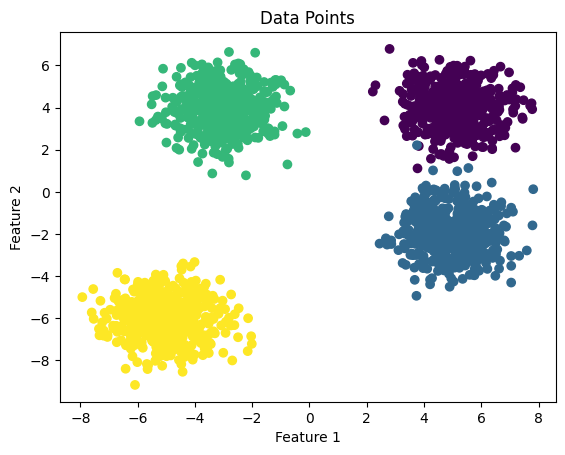

In [9]:
X_train, y_train = datas

# Create a scatter plot
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train)

# Set title and labels
plt.title('Data Points')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

# Show the plot
plt.show()

In [10]:
model=Sequential([
    Dense(25,activation='relu'),
    Dense(15,activation='relu'),
    Dense(4,activation='linear')
])
model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=tf.keras.optimizers.Adam(0.001),
)
model.fit(
    X_train,y_train,
    epochs=100,
)

Epoch 1/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 1.5678
Epoch 2/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4486
Epoch 3/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1404
Epoch 4/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0634
Epoch 5/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0351
Epoch 6/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0218
Epoch 7/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0178
Epoch 8/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0163
Epoch 9/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0118
Epoch 10/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0103
Epoch 11/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0121
Epoch 12/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0072
Epoch 13/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0097
Epoch 14/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0094
Epoch 15/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0075
Epoc

In [13]:
out=model.predict(X_train)
print(out[:5])
print(np.max(out))
print(np.min(out))

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
[[-10.527749   -6.333612   -4.3364425  10.695088 ]
 [ -5.1284733  -9.711335   10.427363   -4.864984 ]
 [ -7.1389923  10.620132   -9.059098   -3.874756 ]
 [  7.931141   -2.8633373  -5.9165897  -3.517344 ]
 [-11.40182    -6.645724   -4.689107   11.488027 ]]
17.773422
-16.240105


In [14]:
prob_format = tf.nn.softmax(out).numpy()
print(prob_format[:5])
print(np.max(prob_format))
print(np.min(prob_format))

[[6.0679028e-10 4.0228091e-08 2.9640748e-07 9.9999958e-01]
 [1.7546311e-07 1.7942136e-09 9.9999958e-01 2.2835889e-07]
 [1.9378042e-08 9.9999946e-01 2.8406575e-09 5.0693205e-07]
 [9.9996787e-01 2.0511794e-05 9.6826238e-07 1.0665284e-05]
 [1.1456864e-10 1.3323304e-08 9.4267087e-08 9.9999982e-01]]
0.99999994
2.3217813e-15


In [15]:
for i in range(5):      #finding the largest
    print( f"{out[i]}, category: {np.argmax(out[i])}")

[-10.527749   -6.333612   -4.3364425  10.695088 ], category: 3
[-5.1284733 -9.711335  10.427363  -4.864984 ], category: 2
[-7.1389923 10.620132  -9.059098  -3.874756 ], category: 1
[ 7.931141  -2.8633373 -5.9165897 -3.517344 ], category: 0
[-11.40182   -6.645724  -4.689107  11.488027], category: 3
